In [2]:
import matplotlib
%matplotlib inline
#matplotlib.use('TkAgg')
import BPV
import pattern_manipulation as pm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [46]:
n = 50
N=5
Wvalues = [0.005,0.008,0.01,0.012,0.015,0.02]
colnames = []
for W in Wvalues:
    colnames.append('W={0}'.format(W))
df = BPV.Data()
df.read_csv("p.delviva.csv",False)
df.df.sort_index(by="p",inplace=True,ascending=False)
df.df.set_index(pd.Index([j for j in range(len(df.df))]), inplace=True)
df = df.data_head(n)
#df.df

In [47]:
firstiter = True
for W,col in zip(Wvalues,colnames):
    print("Solution for W={0}".format(W))
    prbl_pulp = BPV.BPV("pulp",df,N,W,time_solver=False)
    prbl_pulp.solve()
    prbl_pulp.pprint_solution()

    prbl_decV = BPV.BPV("decgraphV",df,N,W,time_solver=False)
    prbl_decV.solve()
    #cProfile.run('prbl.solve()',sort=1)
    prbl_decV.pprint_solution()
    print("-----------------------------------")
    dec_visitlist = prbl_decV.decgraph_len_visitlist
    for i in range(n-1, len(dec_visitlist),-1):
        dec_visitlist.append(0)
    if firstiter:
        visitlist=pd.DataFrame(dec_visitlist, columns=[col])
        firstiter = False
    else:
        visitlist[col] = dec_visitlist

Solution for W=0.005

Solver =  pulp 
Entropy =  0.03453223564464822 
Cardinality =  5 
Rate =  0.00499907208877

Solver =  decgraphV 
Entropy =  0.0345322356446 
Cardinality =  5 
Rate =  0.00499907208877
-----------------------------------
Solution for W=0.008

Solver =  pulp 
Entropy =  0.05145182830521837 
Cardinality =  5 
Rate =  0.00799671511484

Solver =  decgraphV 
Entropy =  0.0514518283052 
Cardinality =  5 
Rate =  0.00799671511484
-----------------------------------
Solution for W=0.01

Solver =  pulp 
Entropy =  0.06180923759097836 
Cardinality =  5 
Rate =  0.00999629100249

Solver =  decgraphV 
Entropy =  0.061809237591 
Cardinality =  5 
Rate =  0.00999629100249
-----------------------------------
Solution for W=0.012

Solver =  pulp 
Entropy =  0.07200880967209104 
Cardinality =  5 
Rate =  0.0119866010149

Solver =  decgraphV 
Entropy =  0.0720104010711 
Cardinality =  5 
Rate =  0.011999308501
-----------------------------------
Solution for W=0.015

Solver =  pulp 

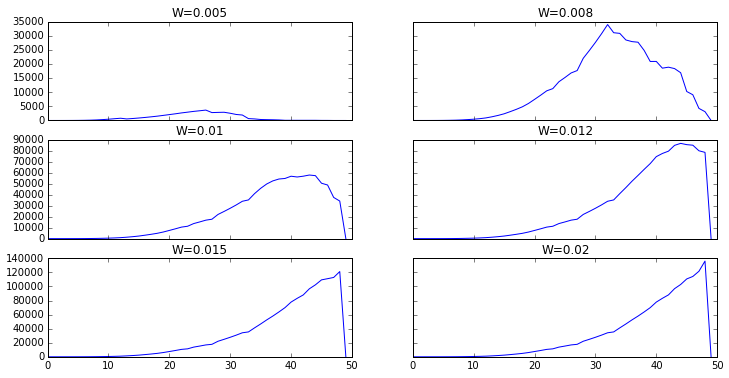

In [50]:
fig, axes = plt.subplots(3,2,figsize=(12, 6), sharex='col', sharey='row')
#fig.subplots_adjust(hspace=0.1, wspace=0.05)
for ax,col in zip(axes.flat,visitlist.columns):
    #ax.set_yscale('log')
    ax.plot(visitlist[col])
    ax.set_title(col)

In [30]:
#visitlist=pd.DataFrame([j for j in range(n)], columns=colnames)
pd.DataFrame([j for j in range(n)])

,0
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9
